 <div class="alert alert-block alert-info" style="margin-top: 20px">
    
<h1 align=center><font size = 5> Group Final Project: Netflix Customer Churn </h1>
</div>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Exploration </h1>

In [160]:
# PREPROCESSING
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [161]:
# Import the dataset
df = pd.read_csv('netflix_customer_churn.csv')

df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [162]:
# Data Exploration
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [163]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [164]:
# Identify numerical columns.
numerical_columns = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']

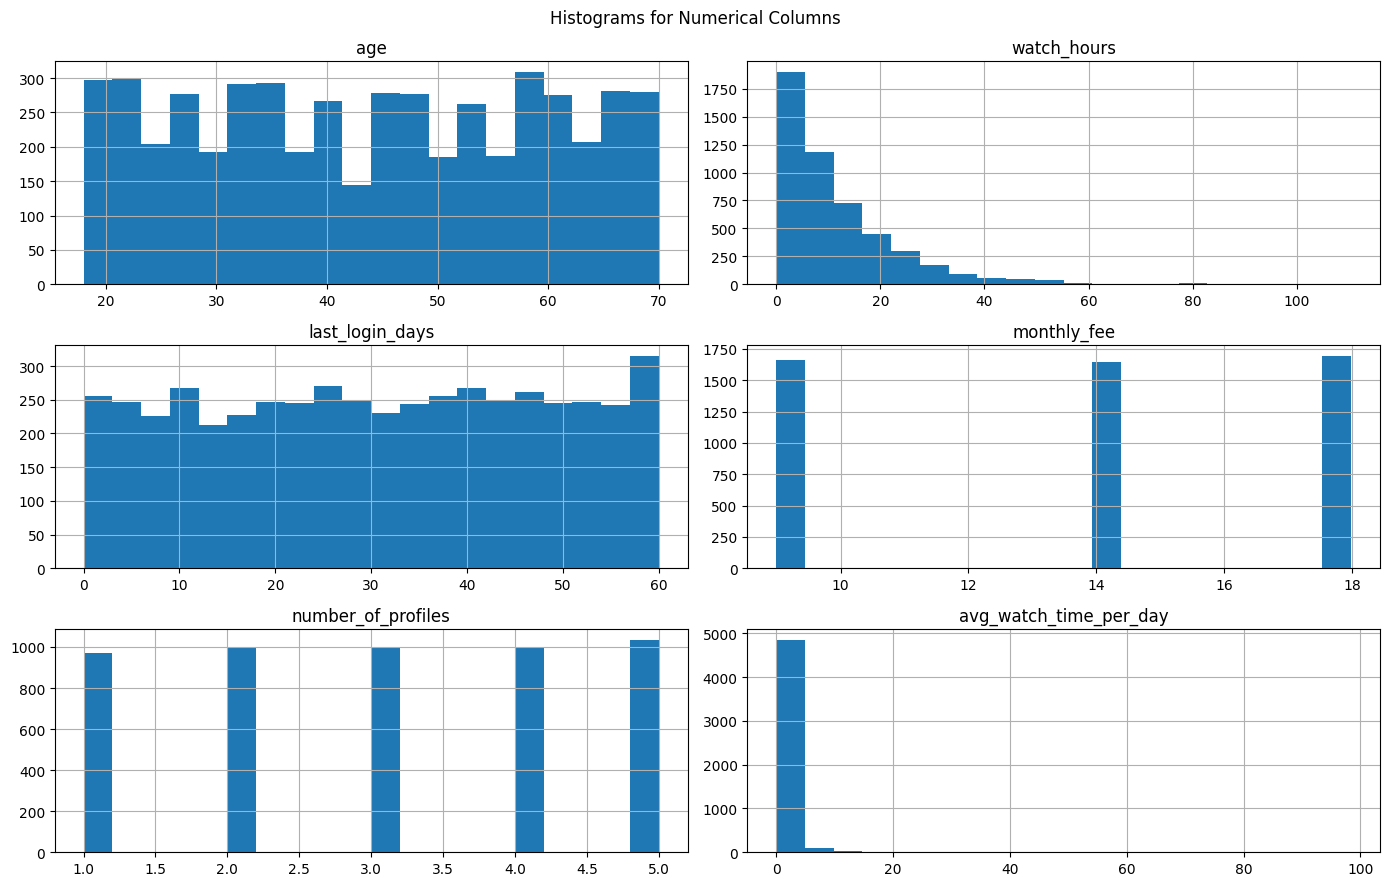

In [165]:
# EXPLORATORY DATA ANALYSIS
# Variable Distribution
import matplotlib.pyplot

# Create histograms for each numerical variable
df[numerical_columns].hist(bins=20, figsize=(14,9))
matplotlib.pyplot.suptitle('Histograms for Numerical Columns')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

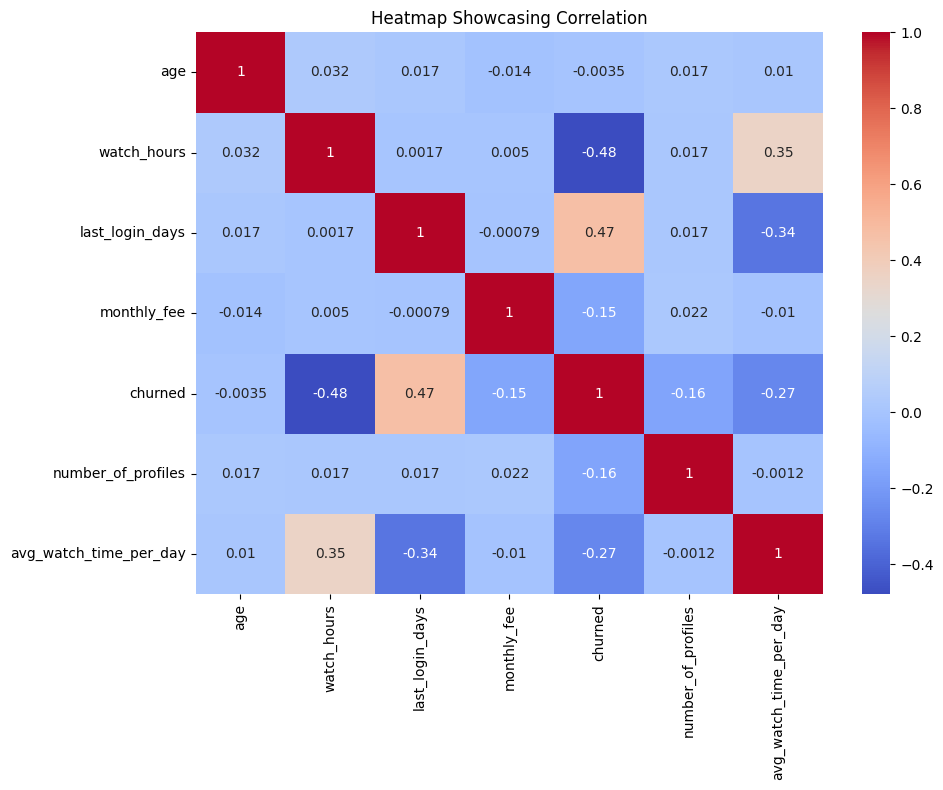

In [166]:
# Correlation Analysis Heatmap Method
df_numeric = df.select_dtypes(include=['number'])
import seaborn
import matplotlib.pyplot as plt

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10,8))
seaborn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Heatmap Showcasing Correlation')
plt.tight_layout()
plt.show()

In [167]:
# Explore class imbalance for churn variable as a count
count_churn = df['churned'].value_counts()
print('Number of Customers who have Churned vs Not Churned')
print(count_churn)

# Explore class imbalance for churn variable as a percentage
churn_percentage = df['churned'].value_counts(normalize=True)*100
print('Percentage of Customers who have Churned vs Not Churned')
print(churn_percentage)

Number of Customers who have Churned vs Not Churned
churned
1    2515
0    2485
Name: count, dtype: int64
Percentage of Customers who have Churned vs Not Churned
churned
1    50.3
0    49.7
Name: proportion, dtype: float64


Text(0, 0.5, 'Number of Customers')

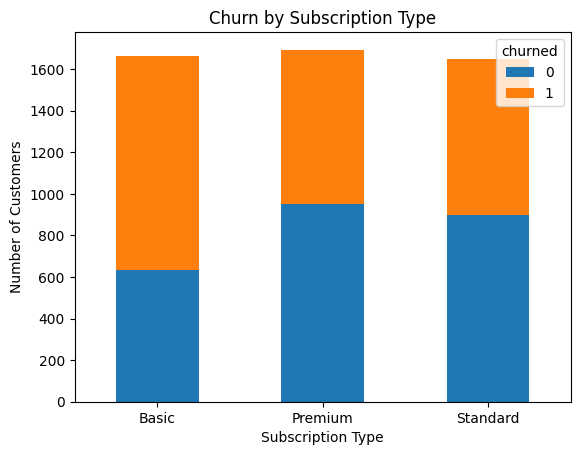

In [168]:
# Visualizations
# Churn by subscription type
churn_by_subscription_type = df.groupby(['subscription_type', 'churned']).size().unstack()
churn_by_subscription_type.plot(kind='bar', stacked=True)

plt.title("Churn by Subscription Type")
plt.xlabel("Subscription Type")
plt.xticks(rotation=0)
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

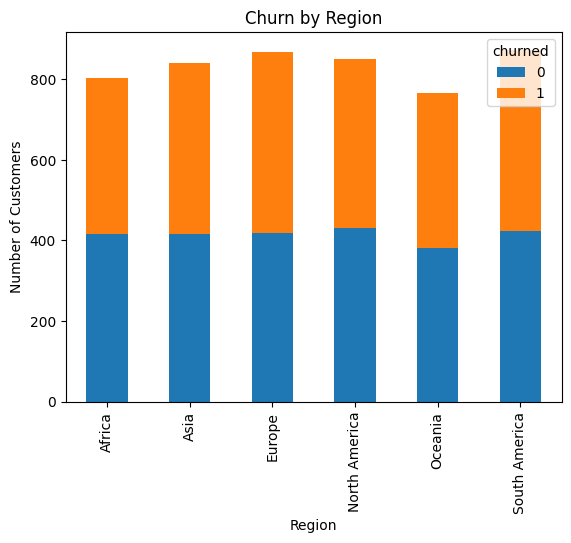

In [169]:
# churn rate by region
churn_by_region = df.groupby(['region', 'churned']).size().unstack()
churn_by_region.plot(kind='bar', stacked=True)

plt.title("Churn by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")

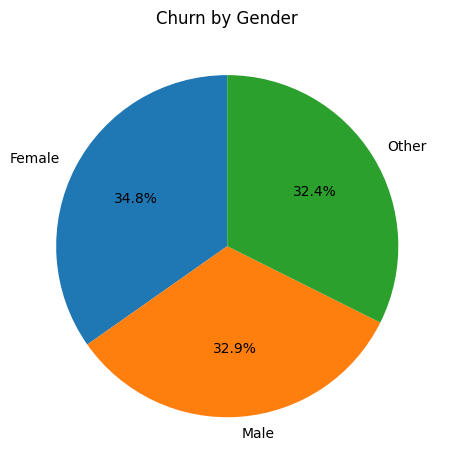

In [170]:
churn_by_gender = df[df['churned'] == True]['gender'].value_counts()

churn_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Churn by Gender")
plt.ylabel("")
plt.tight_layout()
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> CLustering </h1>

In [171]:
# Clustering based on Customer Segments
from sklearn.cluster import KMeans

KMeans = KMeans(n_clusters=4, random_state=42)
df_numeric['cluster']=KMeans.fit_predict(df_numeric[numerical_columns])

print(df_numeric['cluster'].value_counts())

cluster
1    1290
2    1259
0    1235
3    1216
Name: count, dtype: int64


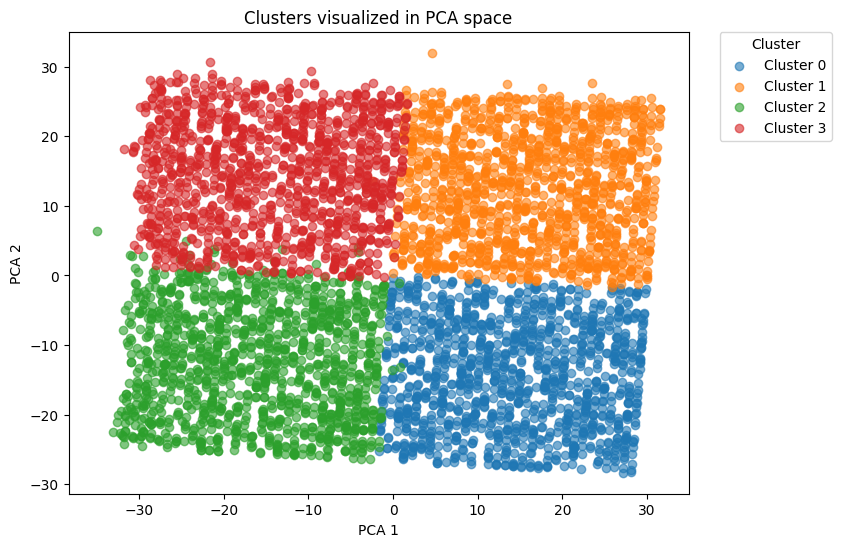

In [172]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Perform PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_numeric[numerical_columns])
# Unique clusters
clusters = df_numeric['cluster'].unique()
clusters.sort()

colors = ListedColormap(['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.figure(figsize=(8,6))
for cluster_id in clusters:
    idx = df_numeric['cluster'] == cluster_id
    plt.scatter(
        components[idx, 0],
        components[idx, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters visualized in PCA space')
plt.legend(
    title='Cluster',
    bbox_to_anchor=(1.05, 1),  # Position to the right
    loc='upper left',
    borderaxespad=0.
)
plt.show()

In [173]:
cluster_0_customers = df_numeric[df_numeric['cluster'] == 0]
print(cluster_0_customers[numerical_columns].mean())

age                       30.444534
watch_hours               10.743150
last_login_days           45.118219
monthly_fee               13.594049
number_of_profiles         3.021053
avg_watch_time_per_day     0.238753
dtype: float64


In [174]:
cluster_1_customers = df_numeric[df_numeric['cluster'] == 1]
print(cluster_1_customers[numerical_columns].mean())

age                       57.275194
watch_hours               12.537109
last_login_days           45.093023
monthly_fee               13.658992
number_of_profiles         3.039535
avg_watch_time_per_day     0.286357
dtype: float64


In [175]:
cluster_2_customers = df_numeric[df_numeric['cluster'] == 2]
print(cluster_2_customers[numerical_columns].mean())

age                       30.147736
watch_hours               12.080770
last_login_days           14.756950
monthly_fee               13.825584
number_of_profiles         3.003177
avg_watch_time_per_day     1.514790
dtype: float64


In [176]:
cluster_3_customers = df_numeric[df_numeric['cluster'] == 3]
print(cluster_3_customers[numerical_columns].mean())

age                       57.398849
watch_hours               11.181661
last_login_days           14.785362
monthly_fee               13.652829
number_of_profiles         3.033717
avg_watch_time_per_day     1.482418
dtype: float64


**Comments:**
Based on the average age of each cluster, the customers can be divided into two main groups:

**Young Group**
This group includes Cluster 0 and Cluster 2, where the average age is around 30 years old. This group is further differentiated by their viewing habits, with Cluster 0 being infrequent users and Cluster 2 being frequent users with higher watch times.

**Old Group**
This group consists of Cluster 1 and Cluster 3, with an average age of about 57 years old. Similar to the young group, this group also has a split between infrequent users (Cluster 1) and frequent users with higher watch times (Cluster 3).

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> One-Hot Encoding </h1>

In [177]:
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head(2)

,customer_id,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Male,gender_Other,...,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,a9b75100-82a8-427a-a208-72f24052884a,51,14.73,29,8.99,1,1,0.49,False,True,...,False,False,True,False,False,False,False,False,False,False
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,0.70,19,13.99,1,5,0.03,False,True,...,False,False,True,False,False,False,False,False,False,True


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Normalize Numeric Variables </h1>

In [178]:
# Scaling Numeric Columns (age, watch hours, last login days, monthly fee,number of profiles, average watch time per day)
numeric_cols = ['age', 'watch_hours', 'last_login_days', 'monthly_fee',
                'number_of_profiles', 'avg_watch_time_per_day']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded[numeric_cols].head()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day
0,0.461471,0.256425,-0.062152,-1.271341,-1.429965,-0.146895
1,0.203399,-0.911432,-0.632462,0.083051,1.395494,-0.322497
2,-1.086959,0.388777,-1.145741,0.083051,-0.723600,0.231031
3,0.590506,-0.594288,-1.031679,1.166565,-0.723600,-0.200339
4,0.784060,-0.812377,-0.974648,0.083051,-0.723600,-0.284322


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Splitting the Data </h1>

In [179]:
X = df_encoded.drop(['customer_id', 'churned'], axis=1)  # Target column stays as churned
y = df_encoded['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Logistic Regression Model </h1>

In [180]:
# Target column
print(df['churned'].value_counts())

churned
1    2515
0    2485
Name: count, dtype: int64


In [181]:
# Training the Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.888


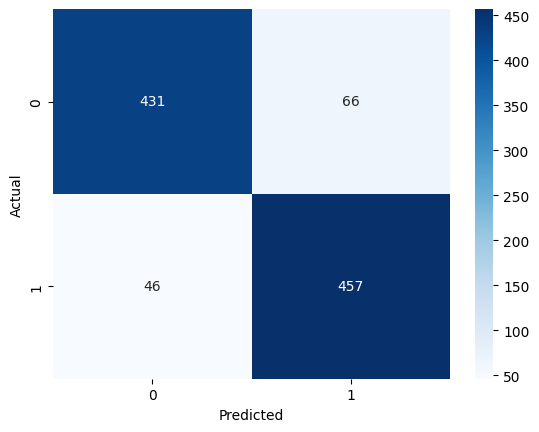

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       497
           1       0.87      0.91      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [182]:
# Evaluation

y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

ROC-AUC Score: 0.9659347736518515


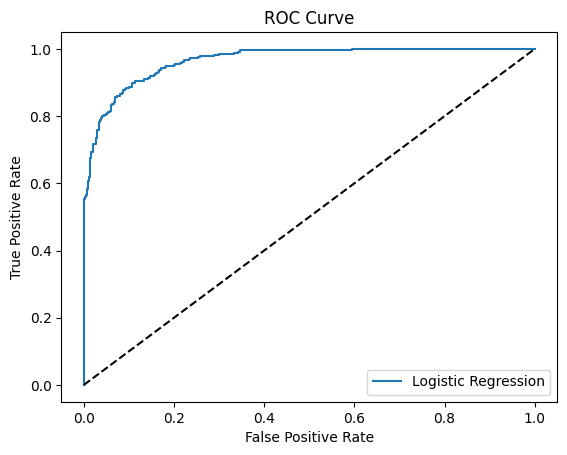

In [183]:
# Performing the ROC-AUC Curve

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The Logistic Regression model performed exceptionally well in predicting customer churn. It achieved an accuracy of 89%, with precision (87%) and recall (91%) for churned customers, indicating strong ability to correctly identify at-risk customers while minimizing false positives.

Furthermore, the model achieved a ROC-AUC score of 0.966, which demonstrates excellent discriminatory power in distinguishing between churned and non-churned customers. This high AUC score suggests the model is highly reliable across various decision thresholds, making it suitable for real-world churn prediction applications.

As a baseline model, Logistic Regression provides a simple, interpretable, and computationally efficient solution. These results establish a strong foundation for churn analysis and can be further enhanced using advanced models such as Decision Trees or Ensemble Methods.

This model can help proactively identify customers at risk of churn, enabling targeted retention campaigns, personalized offers, and improved customer engagement strategies.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Decision Tree </h1>

In [184]:
# Training the Decision Tree Model

# Initializing and training Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.926


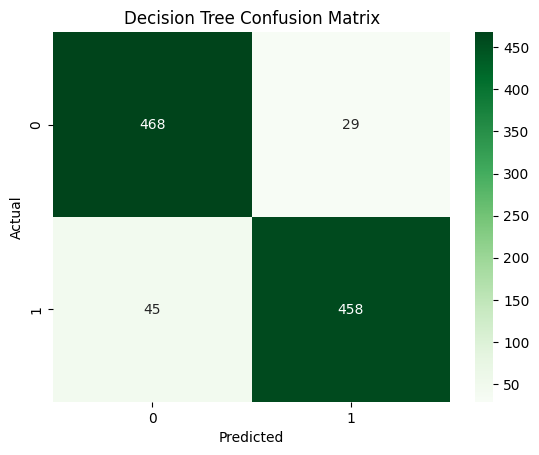

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       497
           1       0.94      0.91      0.93       503

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [185]:
# Evaluation of the Model

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_dt))

ROC-AUC Score: 0.9774731890348053


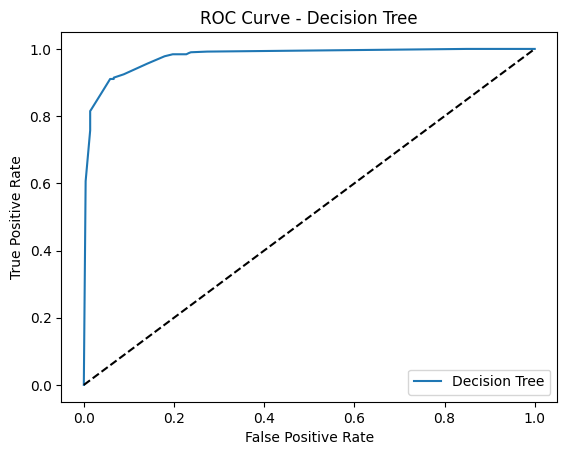

In [186]:
# Performing the ROC-AUC Curve

y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt))

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

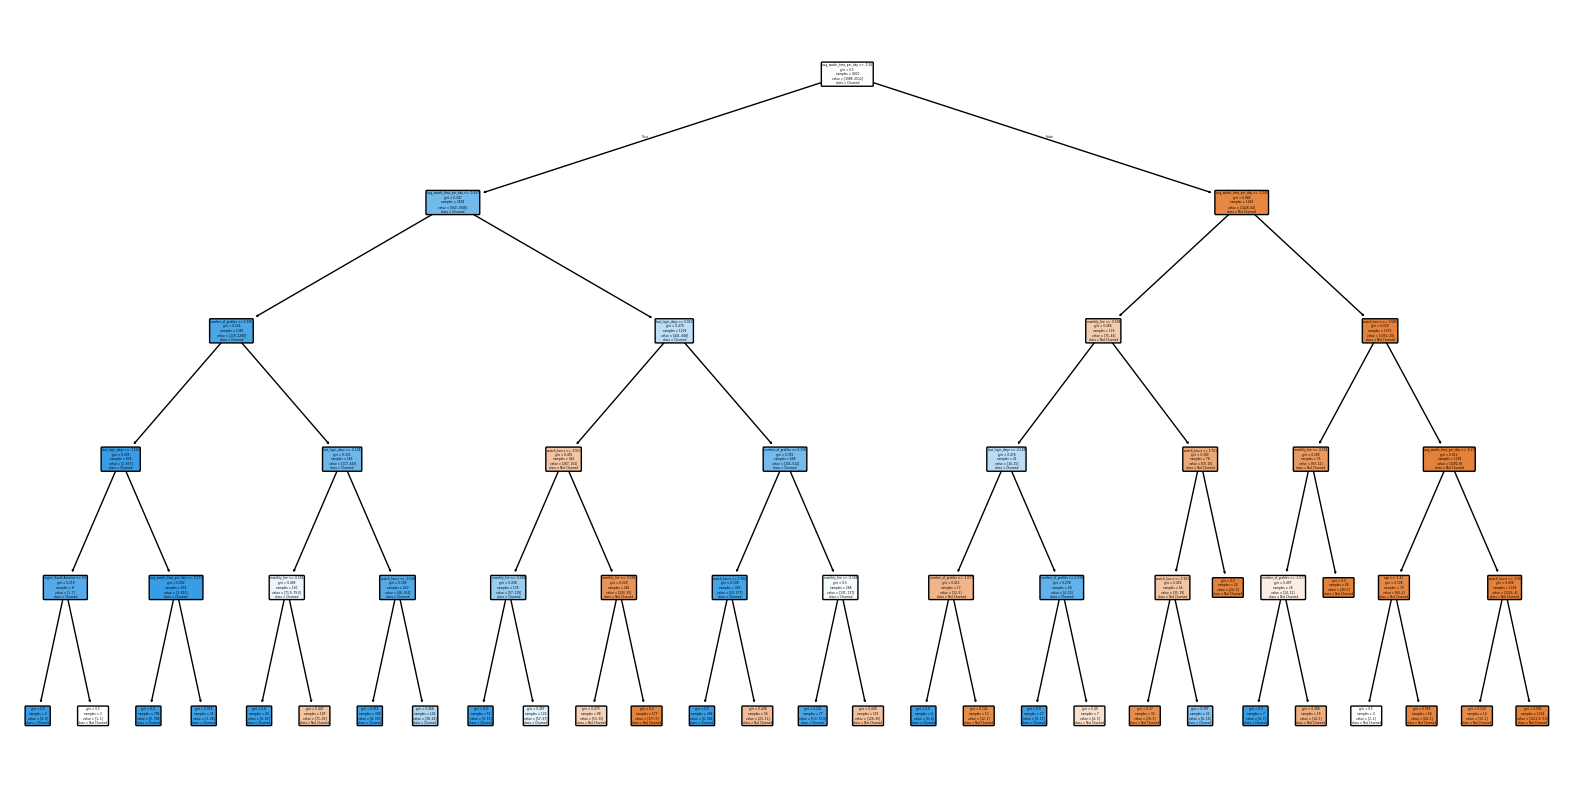

In [187]:
# Visualization of the Decision Tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Churned', 'Churned'], rounded=True)
plt.show()

The Decision Tree model demonstrated strong predictive performance for customer churn. It achieved an accuracy of 93%, with balanced precision and recall for both churned and non-churned customers (Precision: 0.94 for churned, Recall: 0.91). This balance indicates that the model effectively identifies at-risk customers while minimizing false positives.

The ROC-AUC score of 0.977 further highlights the model’s excellent discriminatory power, surpassing our baseline Logistic Regression model (AUC: 0.966). This confirms the Decision Tree’s ability to separate churned from non-churned customers with high reliability.

Business Impact: Given its high interpretability and strong performance, the Decision Tree model can be leveraged to visualize decision paths, providing actionable insights (e.g., subscription type, engagement levels) that directly influence churn. This enables data-driven retention strategies, personalized offers, and proactive interventions to reduce customer churn.

Decision Tree outperformed Logistic Regression across most metrics, especially in accuracy, precision, and ROC-AUC.

Both models have strong recall for churned customers (0.91), which is crucial for identifying at-risk customers.

Logistic Regression remains useful as a baseline model due to its simplicity and interpretability, but Decision Tree provides higher accuracy and better visualization of decision rules.

In [188]:
# Identify numerical and categorical columns.
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> KNN </h1>

Confusion Matrix for KNN:
[[416  81]
 [ 64 439]]


<Figure size 600x500 with 0 Axes>

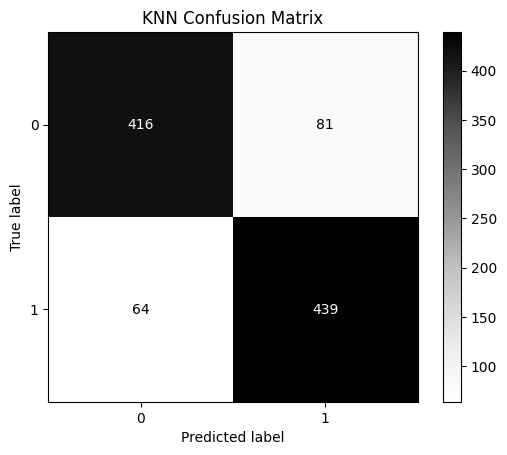

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Instantiate the KNN classifier with n_neighbors=5.
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model on the training data.
knn_model.fit(X_train, y_train)
# Make predictions on the test set.
y_pred = knn_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix for KNN:")
print(cm_knn)

plt.figure(figsize=(6, 5))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(values_format='d',cmap='Greys')
plt.title("KNN Confusion Matrix")
plt.grid(False)
plt.show()

In [190]:
# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the KNN model: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy of the KNN model: 0.8550

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       497
           1       0.84      0.87      0.86       503

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000



KNN ROC AUC Score: 0.9326


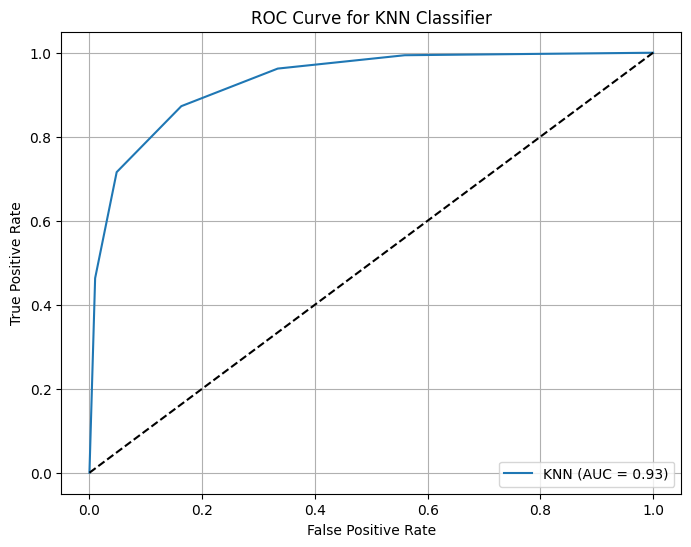

In [191]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# Get predicted probabilities
y_proba = knn_model.predict_proba(X_test)[:, 1]  # prob of the positive class
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"KNN ROC AUC Score: {roc_auc:.4f}")
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Random Forest (Bagging)</h1>



Confusion Matrix for Random Forest:
[[490   7]
 [ 10 493]]


<Figure size 600x500 with 0 Axes>

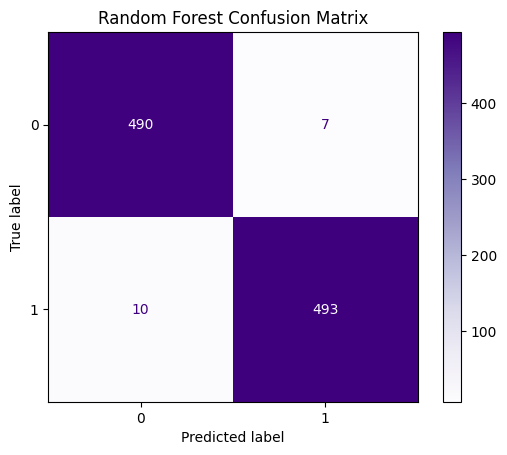

In [192]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the Random Forest classifier.
# use 100 trees (n_estimators=100) and a random_state
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix for Random Forest:")
print(cm_rf)

plt.figure(figsize=(6, 5))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(values_format='d',cmap='Purples')
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()


In [193]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the Random Forest model: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy of the Random Forest model: 0.8550

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       497
           1       0.84      0.87      0.86       503

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000



Random Forest ROC AUC Score: 0.9977


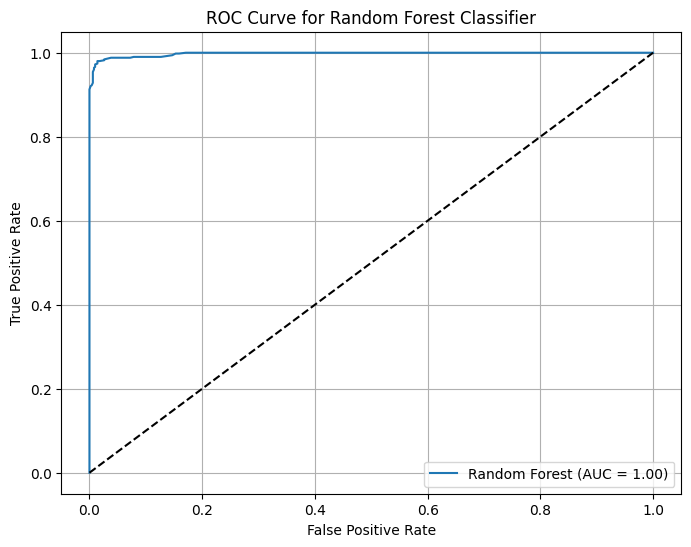

In [194]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> XGBOOST (Boosting)</h1>

In [195]:
import xgboost as xgb


Confusion Matrix for XGBoost:
[[497   0]
 [  4 499]]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:20:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 600x500 with 0 Axes>

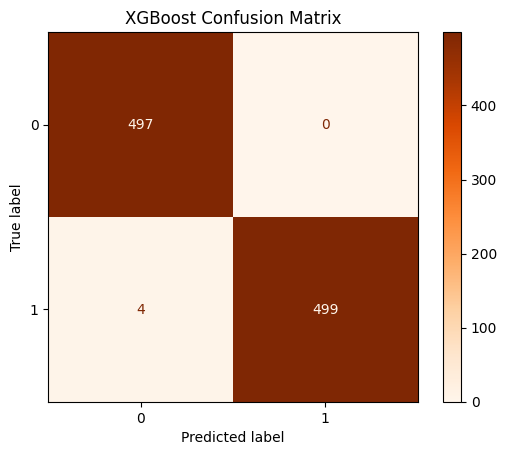

Accuracy of the XGBoost model: 0.8550

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       497
           1       0.84      0.87      0.86       503

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000



In [196]:
# Instantiate the XGBoost classifier.
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("\nConfusion Matrix for XGBoost:")
print(cm_xgb)

plt.figure(figsize=(6, 5))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(values_format='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.grid(False)
plt.show()
# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the XGBoost model: {accuracy:.4f}")
print("\nClassification Report:\n", report)

XGBoost ROC AUC Score: 0.9998


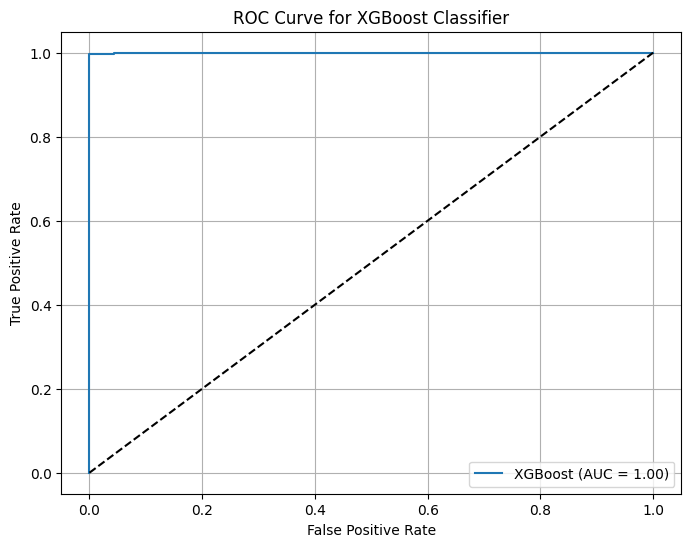

In [197]:
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"XGBoost ROC AUC Score: {roc_auc_xgb:.4f}")
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Evaluation </h1>

In [198]:
model_results = {
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "Random Forest", "XGBoost"],
    "Accuracy": [0.888, 0.926, 0.855, 0.855, 0.855],
    "ROC AUC": [0.9659, 0.9775, 0.9326, 0.9977, 0.9998]
}
results_df = pd.DataFrame(model_results)
results_df["Accuracy"] = results_df["Accuracy"].apply(lambda x: f"{x:.3f}")
results_df["ROC AUC"] = results_df["ROC AUC"].apply(lambda x: f"{x:.4f}")

print("Overall Model Comparison (Accuracy, ROC AUC):\n")
results_df

Overall Model Comparison (Accuracy, ROC AUC):



,Model,Accuracy,ROC AUC
0,Logistic Regression,0.888,0.9659
1,Decision Tree,0.926,0.9775
2,KNN,0.855,0.9326
3,Random Forest,0.855,0.9977
4,XGBoost,0.855,0.9998


**Logistic Regression**

High AUC (0.966) indicates the model separates churn vs non-churn very well.

Accuracy (88.8%) and balanced precision/recall across both classes.

Suggests that linear decision boundaries are fairly effective for this dataset.

Insight: Logistic regression could be a good, explainable baseline.

**Decision Tree**

Highest accuracy (92.6%), well-balanced metrics.

Slight tradeoff between class 0 and 1 (precision vs recall), but not significant.

AUC is very strong (0.977).

Insight: Simple tree-based rules are capturing customer churn patterns well — customers likely follow clear behavioral patterns before churning.

**K-Nearest Neighbors (KNN)**
Lowest accuracy (85.5%), and lowest AUC (0.933).

Decent balance between precision and recall, but overall weaker than others.

Insight: KNN might not be suitable for this dataset.

**Random Forest**
Same accuracy as KNN (85.5%), but extremely high AUC (0.998).

Precision and recall are balanced, but accuracy suggests overfitting could be a risk.

Insight: The model is very good at ranking predictions (high AUC), but may need better threshold tuning or feature engineering to improve classification accuracy.

**XGBoost**
Same accuracy as RF, but even higher AUC (0.9998).

Like RF, great at ranking (AUC), not as great in outright classification accuracy.

Insight: XGBoost is extremely good at understanding the data's complexity — it just needs better threshold calibration or optimization for classification metrics.